## **Context**

* Nowadays, there is a huge demand for used cars, and it keeps increasing due to different reasons. Among them, 2 stands out. The first and most recent, the COVID-19 pandemic, which came with lockdowns on different countries all around the world and this caused the paralization of certain manufacturing non essential industries, such as the ones that the car industry depends on (tires, auto parts, etc) and the car industry itself. This caused a lack of offer of new cars, forcing buyers to search in the second hand market. The second reason, it is given by the change in paradigm about the need of buying new things, and instead acquire second or third hand things, in order to avoid or reduce the negative effects that industry have over our planet and the ecosystem in general.
* Now, unlike new cars, which price is determined mostly by their manufacterers, used cars princing is much more complicated, and several factors came to play, so it isn't an easy task to define the right price to a car, whether you are a buyer or a seller.

### **The objectives:**

* The objective is to come up with a pricing model that is able to predict the price of used cars and help the business in develop profitable strategies.

**The key questions:**

* Can we predict the price of a used car knowing their characteristics?
* Which are the factors that determine the price of a used car?
* How important, in comparison with each other, are those factors?

**The problem formulation**:

* Nowadays, there is no pricing model to accurately determine the price of used cars within a certain geographic area in a determined period of time.

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM.

**Fuel_Type** : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car. (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC.

**Power** : The maximum power of the engine in bhp.

**Seats** : The number of seats in the car.

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [1]:
#Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

### **Let us load the data**

In [2]:
data = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [3]:
# View first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
# View last 5 rows Hint: Use tail() method
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


#### **Observations and Insights:**

* Dataset has 7252 rows and 14 columns.
* Columns in the dataset contain different characteristics of the cars, such as year, model, kilometers driven, number of seats, among others.
* Apparently, S.No. column is just an index.
* We have some missing values in columns. Further analysis is needed.
* We have numerical and categorical variables in the dataset.

### **Let us check the data types and and missing values of each column** 

In [5]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [6]:
# Check total number of missing values of each column. Hint: Use isnull() method
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

#### **Observations and Insights:**

* There are no missing values in S.No, Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission and Owner_Type columns.
* Mileage column has 2 missing values.
* Engine has 46 missing values.
* Power has 175 missing values. 
* Seats has 53 missing values.
* New_price has 6247 missing values.
* Price has 1234 missing values.

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence it can be dropped.

In [7]:
# As the serial number variable provides no value for our model, we drop the column (it is just the index)
data = data.drop(['S.No.'], axis = 1)

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [8]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


#### **Observations and Insights:**

* Cars models goes from 1996 to 2019.
* The max value for kilometers driven is 6.500.000, which is likely to be a mistake.
* Power also have a wide range, from 34 to 616. It may be due to outliers.

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [9]:
# Explore basic summary statistics of categorical variables.

categorical = data.select_dtypes('object').columns

for cols in categorical:
    print (f'Variable: {cols}')
    print(data[cols].describe())
    print()

Variable: Name
count                       7253
unique                      2041
top       Mahindra XUV500 W8 2WD
freq                          55
Name: Name, dtype: object

Variable: Location
count       7253
unique        11
top       Mumbai
freq         949
Name: Location, dtype: object

Variable: Fuel_Type
count       7253
unique         5
top       Diesel
freq        3852
Name: Fuel_Type, dtype: object

Variable: Transmission
count       7253
unique         2
top       Manual
freq        5204
Name: Transmission, dtype: object

Variable: Owner_Type
count      7253
unique        4
top       First
freq       5952
Name: Owner_Type, dtype: object



#### **Observations and Insights:**

* We have 2041 unique car models in the dataset.
* The most repeated one is a Mahindra model, with 55 instances on the dataset.
* There are 11 cities in the dataset.
* The most popular one is Mumbai, with 949 instances.
* There are 5 types of propulsion (fuel_type) for the cars in the dataset.
* The most popular fuel type is Diesel, which is not surprising, being the most popular worldwide.
* There are 4 types of owners, corresponding the person who first bought the car, then the person who bought it second, and so on, until fourth or more. 

**Check Kilometers_Driven extreme values**

In [10]:
#Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values('Kilometers_Driven', ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights:**

* The max value in Kilometers_Driven column is 6,500,000. Comparing it with the other values, and considerating that is a 2017 car, this is likely to be a mistake.

In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [11]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop(2328, inplace=True)
data.reset_index(inplace=True, drop=True)

**Check Mileage extreme values**

In [12]:
#Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values('Mileage').head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2596,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2342,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5269,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6856,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5118,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5021,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5015,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2541,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [13]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='red', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.

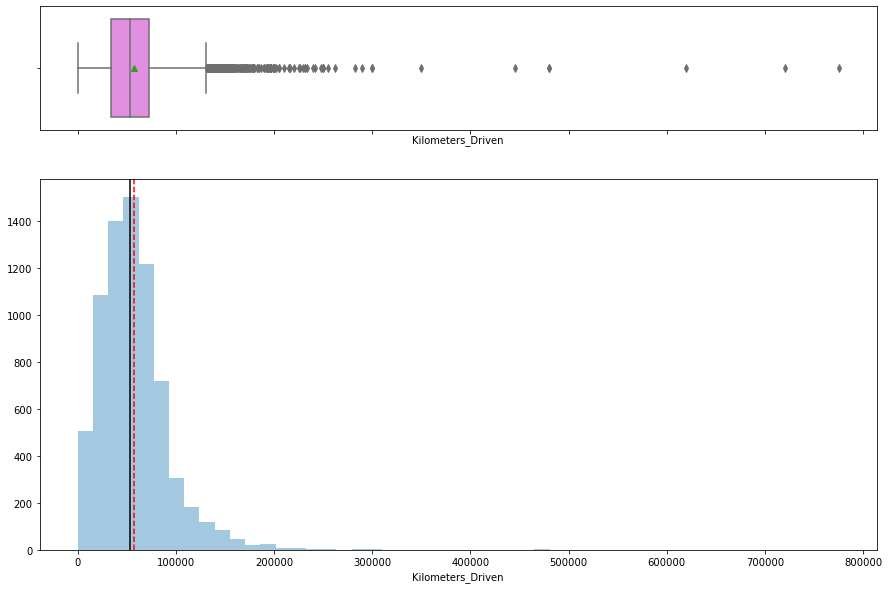

In [14]:
#Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

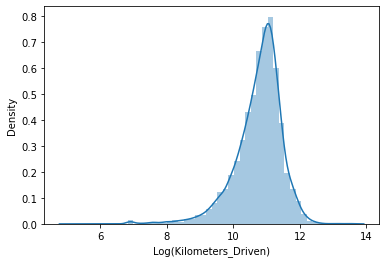

In [15]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel="Log(Kilometers_Driven)");

#### **Observations and Insights:**

* With logaritmic transformation, we achieved to normalize distribution of Kilometers_Driven variable.

In [16]:
### We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**

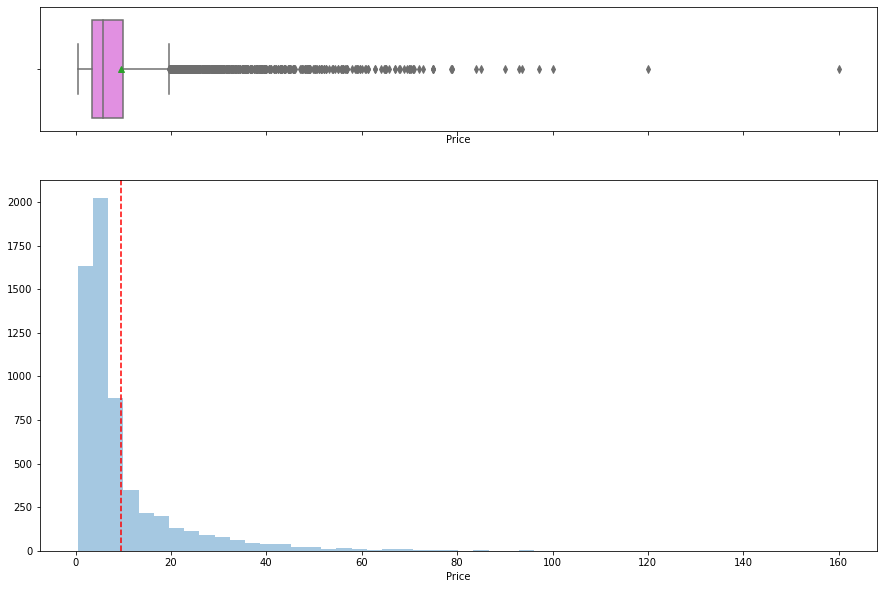

In [17]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

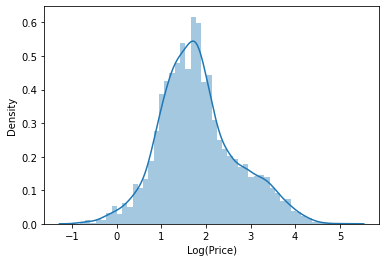

In [18]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel="Log(Price)");

In [19]:
# We can Add a transformed Price feature in data
data["price_log"] = np.log(data["Price"])

#### Lets plot all numerical variables to visualize their distribution.

Skew : -0.84


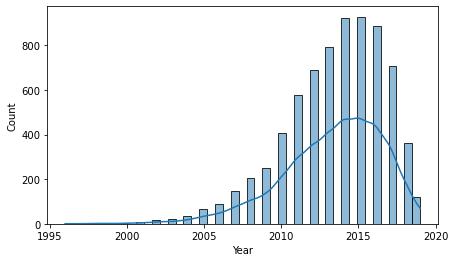

Skew : 3.83


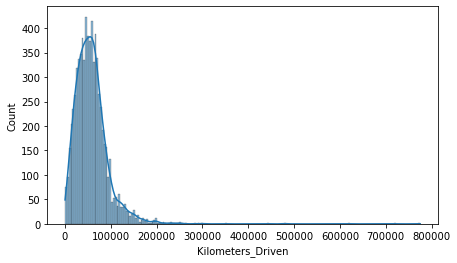

Skew : -0.44


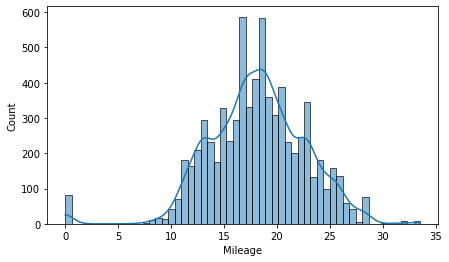

Skew : 1.41


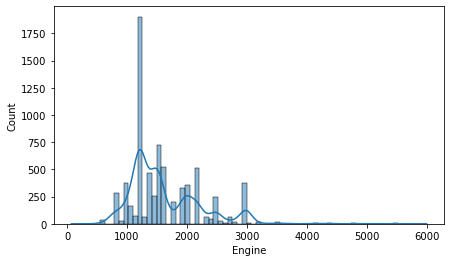

Skew : 1.96


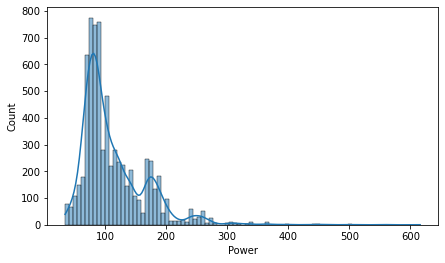

Skew : 1.95


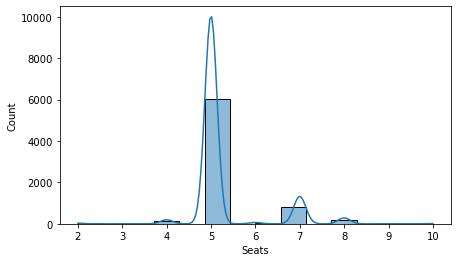

Skew : 4.13


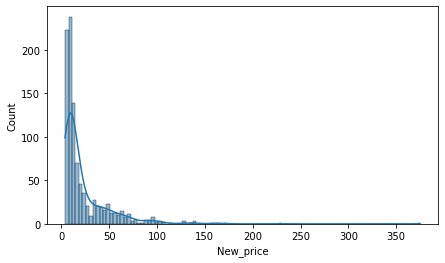

Skew : 3.34


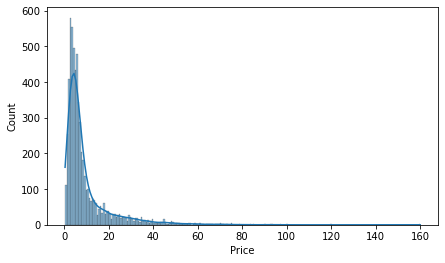

Skew : -1.35


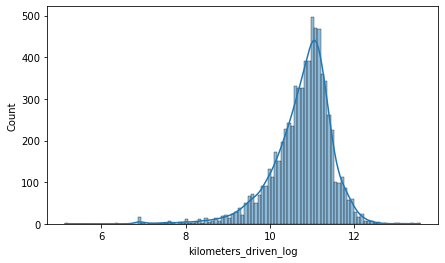

Skew : 0.42


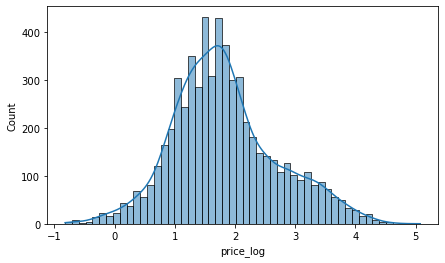

In [20]:
# Plotting numerical variables to look at their distributions
numerical = data.select_dtypes('number').columns

for i in numerical:
    print('Skew :', round(data[i].skew(), 2))
    plt.figure(figsize = (7, 4))
    sns.histplot(data = data, x = i, kde = True)
    plt.show()

#### **Observations and Insights for all the plots:**

* Year variable have a distribution highly skewed to the right.
* Mileage variable have a normal distribution.
* Engine variable have a very irregular and left-skewed distribution.
* Power variable have a left-skewed distribution.
* Seat variable plot shows that most of cars have 5 seats, followed by far by 7 seats cars, which make its distribution highly irregular.
* New_price variable have a very left skewed distribution.

## **2. Univariate analysis - Categorical Data**

In [21]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 # width of the plot
        y = p.get_y() + p.get_height() + 3        # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12, ha='center') # annotate the percantage
    
    plt.show() # show the plot

#### Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.

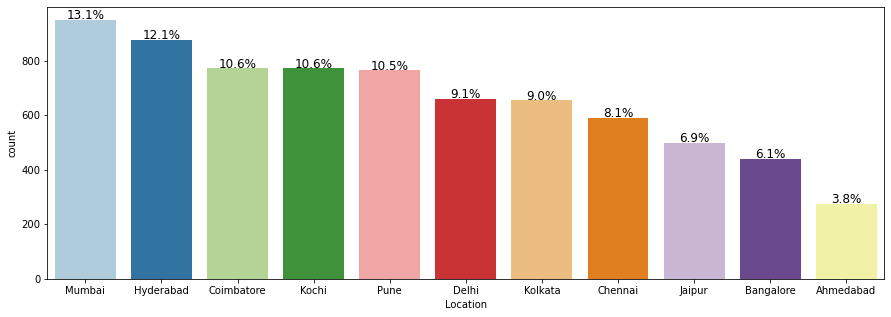

In [22]:
#Bar Plot for 'Location'
perc_on_bar('Location')

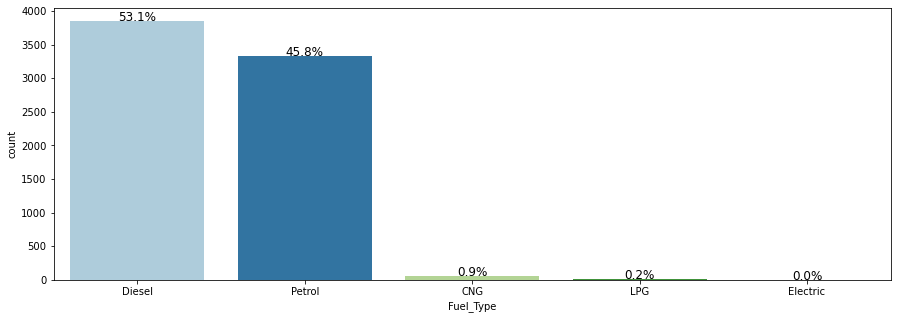

In [23]:
#Bar Plot for 'Fuel_Type'
perc_on_bar('Fuel_Type')

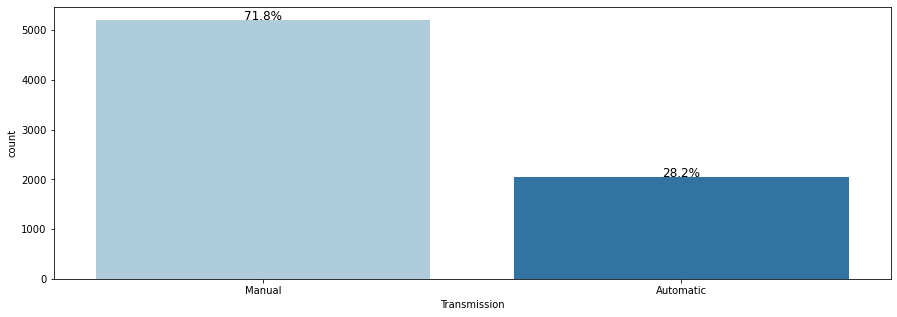

In [24]:
#Bar Plot for 'Transmission'
perc_on_bar('Transmission')

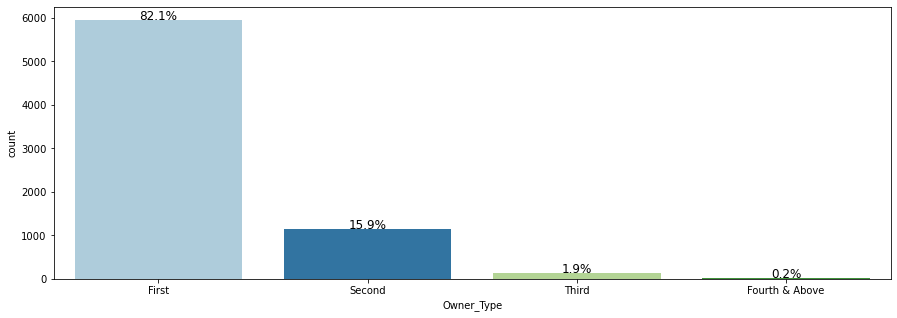

In [25]:
#Bar Plot for 'Owner_Type'
perc_on_bar('Owner_Type')

#### **Observations and Insights from all plots:**

* For location variable, all cities have a significant participation on the data, being the most popular Mumbai but followed closely by the others.
* For Fuel_Type variable, almost all of the cars correspond to only two types: diesel and petrol, and only 1% of the data correspond to any of the other three types.
* Most of the cars (~70%) correspond to manual transmission, while ~30% correspond to manual transmission.
* Most of the owners in the dataset correspond to people who have bought the a brand new car from the dealership (~82%), followed by far by second owners (~16%) and a very small amount of third, fourth and above owners (~2%).

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: We'll use log transformed values 'kilometers_driven_log' and 'price_log'**

<AxesSubplot:xlabel='price_log'>

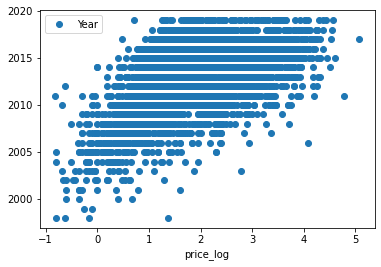

In [26]:
#Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x='price_log', y='Year', style='o')

<AxesSubplot:xlabel='kilometers_driven_log'>

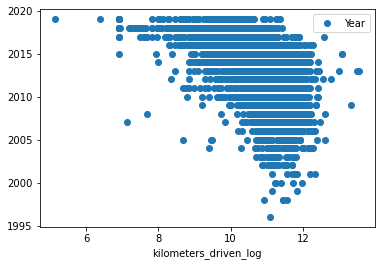

In [27]:
data.plot(x='kilometers_driven_log', y='Year', style='o')

<AxesSubplot:xlabel='Mileage'>

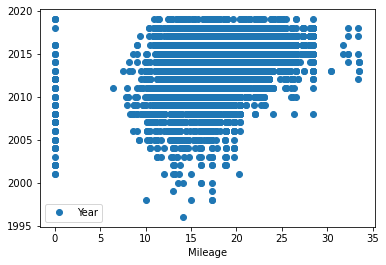

In [28]:
data.plot(x='Mileage', y='Year', style='o')

<AxesSubplot:xlabel='price_log'>

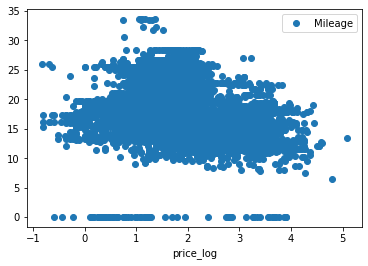

In [29]:
data.plot(x='price_log', y='Mileage', style='o')

<AxesSubplot:xlabel='price_log'>

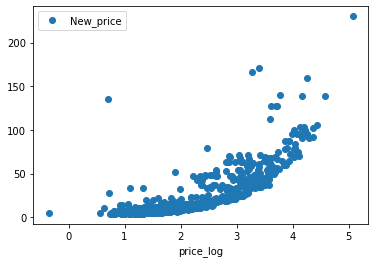

In [30]:
data.plot(x='price_log', y='New_price', style='o')

<AxesSubplot:xlabel='price_log'>

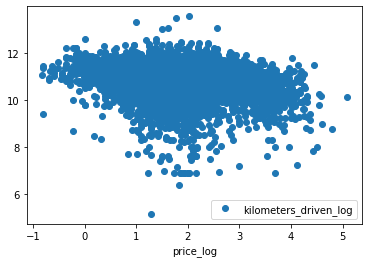

In [31]:
data.plot(x='price_log', y='kilometers_driven_log', style='o')

#### **Observations and Insights from all plots:**

* According to the plots, for newer cars there is a higher price, which makes perfectly sense.
* In the case of the logarithmic kilometers driven, plot indicates that as the car gets newer, have less kilometers driven, which also makes perfectly sense.
* In case of the mileage and price_log relationship, we can say that there is no clear pattern. We can also see that there is a lot of instances with 0 as mileage, which is likely to be a mistake.
* in case of the price_log and new_price relationship, there is a clear upwards pattern, indicating a possitive correlation.
* Finally, in case of the price_log and kilometers_driven_log, we can see that there is no clear pattern.

### **2. Heat map**
Heat map shows a 2D correlation matrix between two discrete features

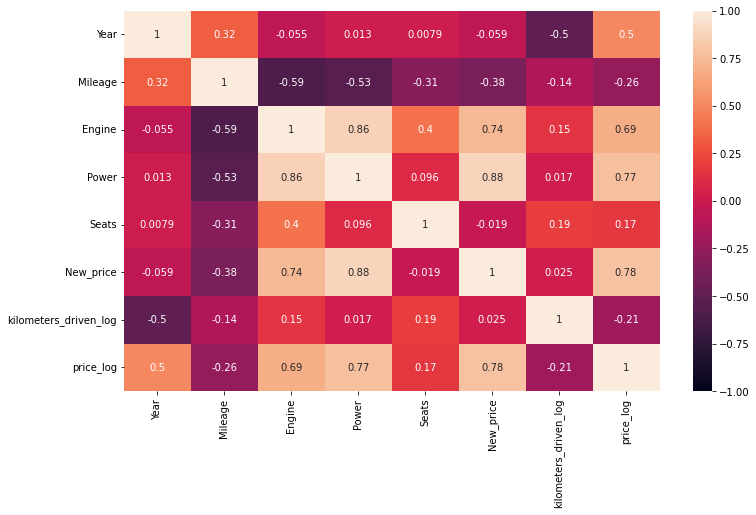

In [32]:
#We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Kilometers_Driven', 'Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

**Observations and Insights:**

* Year variable has significant correlations with kilometers_driven_log and price_log variables (-0.5 and 0.5).
* Mileage have a significant negative correlation with engine variable, as well as with power.
* Engine have a very high positive correlation with power variable.
* Power have a very high correlation with new_price variable.
* Seats variable have no significant correlations.
* kilometers_driven_log variable have no significant correlation with the other variables on the dataset.
* price_log variable have a very high correlation with engine, power and new_price variables.

### **3. Box plot**

In [33]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    plt.figure(figsize=(12, 5)) #setting size of boxplot
    sns.boxplot(x=z, y=data['Price']) # defining x and y
    plt.show()
    plt.figure(figsize=(12, 5))
    plt.title('Without Outliers')
    sns.boxplot(x=z, y=data['Price'],showfliers=False) #turning off the outliers
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

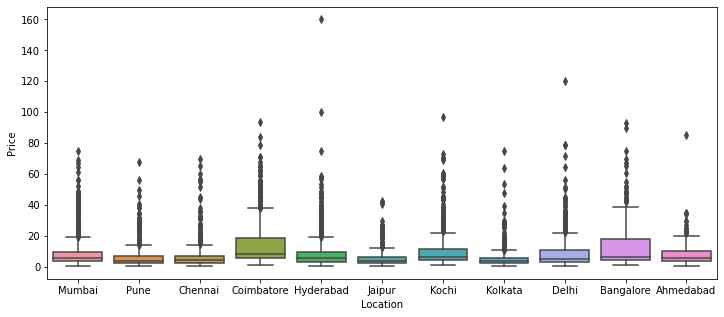

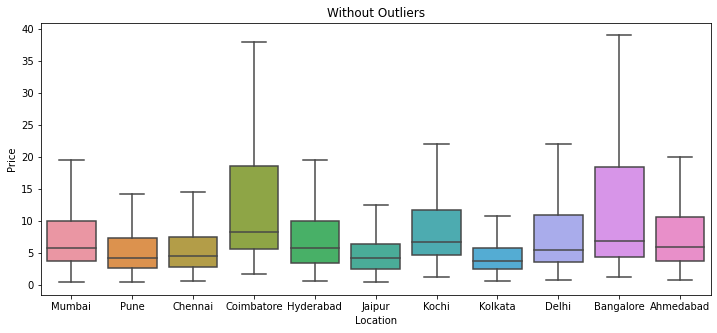

In [34]:
#Box Plot:Price vs Location
boxplot(data['Location'])

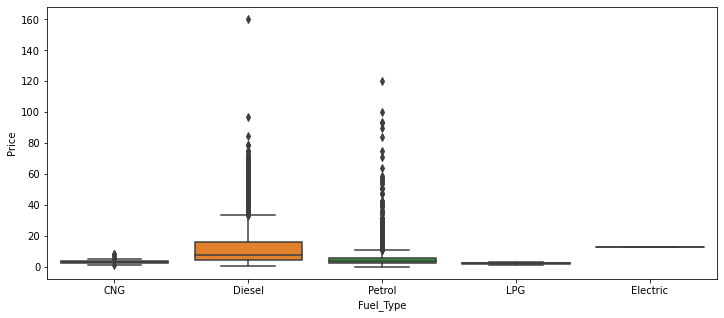

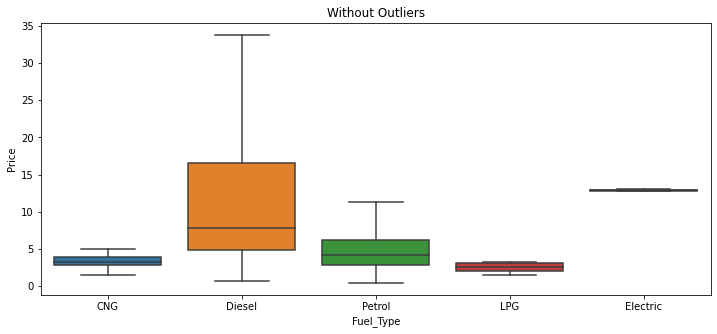

In [35]:
boxplot(data['Fuel_Type'])

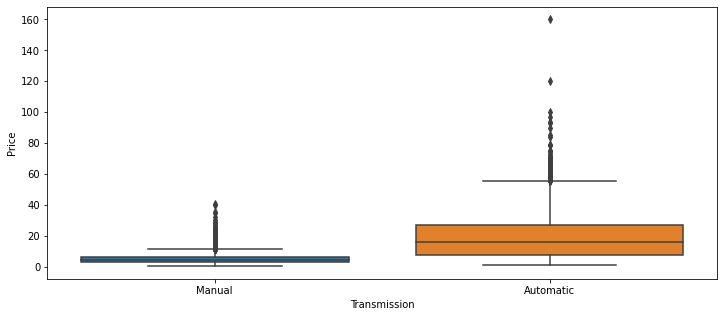

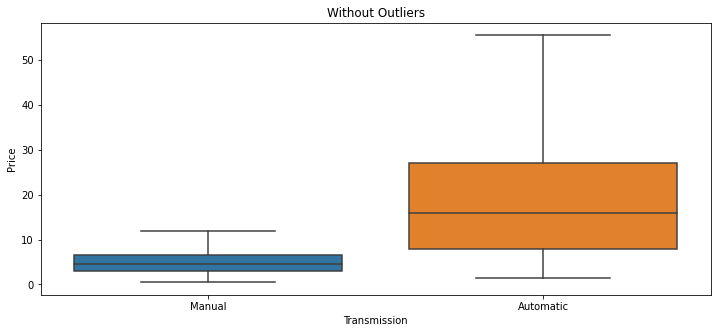

In [36]:
boxplot(data['Transmission'])

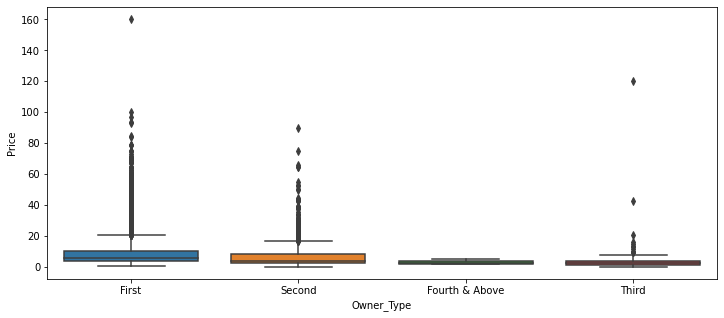

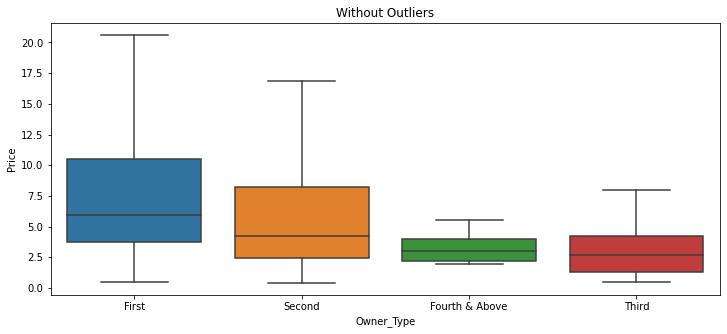

In [37]:
boxplot(data['Owner_Type'])

**Observations and Insights for all plots**

* As a general observation, plotted variables have significant amount of outliers, which alter our plots and could alter the analysis of our model.
* Most of the variables have some degree of skewness.
* In average, Most expensive vehicles are sold in Coimbatore and Bangalore.
* Refering to the propulsion type of cars, electric cars have a very small range of prices, being almost the most expensive type, just below diesel, which have a much wider range of prices.
* Manual cars have a very small range of prices, while automatic cars present a wider range and higher average prices.
* As one could expect, first owner cars tend to be the most expensives, followed by second owner cars, then third owner cars and finally fourth and above owners.

### **Feature engineering**

With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [38]:
# Lets separate the 'Name' column with the useful data we're going to use: brand and model

brand_list = []
model_list = []
i = 0

for elem in data['Name']:
    brand_list.append(elem.split(' ')[0])
    model_list.append(elem.split(' ')[1])
    i =+ 1
    
brand = pd.Series(brand_list)
model = pd.Series(model_list)

data.insert(loc = 0, column = 'Brand', value = brand)
data.insert(loc = 1, column = 'Model', value = model)

# Drop the old 'Name column'
data = data.drop(['Name'], axis = 1)

In [39]:
# Let's see how is our dataframe now
data

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log
0,Maruti,Wagon,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729
2,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077
3,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759
4,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7247,Volkswagen,Vento,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN,11.400999,NaN
7248,Volkswagen,Polo,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN,10.985293,NaN
7249,Nissan,Micra,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN,10.239960,NaN
7250,Volkswagen,Polo,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN,10.864025,NaN


In [40]:
# Let's check the summary statistics of our new variables

print(data['Brand'].describe())
print()
print(data['Model'].describe())

count       7252
unique        33
top       Maruti
freq        1444
Name: Brand, dtype: object

count      7252
unique      219
top       Swift
freq        418
Name: Model, dtype: object


#### **Observations and Insights:**

* We achieved to reduce unique values from 2041 to 33 brands and 219 models.
* With this we could make a much more accurate model.
* We will no longer use the rest of the info contained in the original name of the cars.

### **Missing value treatment**

In [41]:
# Now check the missing values of each column.

for cols in data.columns:
    print(f'Missing values in {cols} column:')
    print(data[cols].isnull().sum())
    print('-' *45)

Missing values in Brand column:
0
---------------------------------------------
Missing values in Model column:
0
---------------------------------------------
Missing values in Location column:
0
---------------------------------------------
Missing values in Year column:
0
---------------------------------------------
Missing values in Kilometers_Driven column:
0
---------------------------------------------
Missing values in Fuel_Type column:
0
---------------------------------------------
Missing values in Transmission column:
0
---------------------------------------------
Missing values in Owner_Type column:
0
---------------------------------------------
Missing values in Mileage column:
2
---------------------------------------------
Missing values in Engine column:
46
---------------------------------------------
Missing values in Power column:
175
---------------------------------------------
Missing values in Seats column:
53
---------------------------------------------
Mis

#### **Observations and Insights:**

* In Brand, Model, Location, Year, Kilometers_Driven (and log version), Fuel_Type, Transmission and Owner_Type there are no missing values.
* In Mileage, Engine, Power and Seats columns there are a few missing values missing values.
* In New_price column there are a very large amount of missing values, more than half of data is missing.
* In price column there are a signicant amount of missing values.

**Missing values in Seats**

In [42]:
data.loc[(data['Seats'].isnull())]

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log
194,Honda,City,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,2.95,11.002200,1.081805
208,Maruti,Swift,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2.11,10.645449,0.746688
229,Ford,Figo,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,NaN,3.60,11.162460,1.280934
733,Maruti,Swift,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,1.75,11.490680,0.559616
749,Land,Rover,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,26.50,10.915107,3.277145
1294,Honda,City,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3.20,10.915179,1.163151
1327,Maruti,Swift,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,5.80,10.825661,1.757858
1385,Honda,City,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,1.50,11.652687,0.405465
1460,Land,Rover,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,40.88,11.142992,3.710641
1917,Honda,City,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,NaN,1.70,11.385092,0.530628


In [43]:
data.groupby(["Brand", "Model"], as_index = False)["Seats"].median()

,Brand,Model,Seats
0,Ambassador,Classic,5.0
1,Audi,A3,5.0
2,Audi,A4,5.0
3,Audi,A6,5.0
4,Audi,A7,5.0
...,...,...,...
218,Volvo,S60,5.0
219,Volvo,S80,5.0
220,Volvo,V40,5.0
221,Volvo,XC60,5.0


In [44]:
# Impute missing values in Seats,you can use fillna method in pandas
data['Seats'] = data.groupby(["Brand", "Model"])["Seats"].apply(lambda x: x.fillna(x.median()))

We see that there are still 3 missing values in the seats column. *Lets take a closer look*

In [45]:
data[data['Seats'].isnull()]

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log
2368,Maruti,Estilo,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.50,10.933107,0.405465
3881,Maruti,Estilo,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,2.50,10.596635,0.916291
5892,Maruti,Estilo,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.75,10.839581,0.559616


We see that they are all the same brand and model, and they kept missing because there is no instance of that brand and model with a value for seat column. For filling it, we investigated about that specific model, and we finded out that correspond to a 5 seats model. We'll input that value.

In [46]:
data['Seats'].fillna(5, inplace=True)

In [47]:
# Let's check if there are missing values in the seats column

data.loc[(data['Seats'].isnull())]

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log


**Missing values for Mileage**

In [48]:
data.loc[(data['Mileage'].isnull())]

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log
4445,Mahindra,E,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,10.819778,2.564949
4903,Toyota,Prius,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,10.691945,2.545531


**Missing values for Engine**

In [49]:
data.loc[(data['Engine'].isnull())]

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log
194,Honda,City,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,5.0,NaN,2.95,11.002200,1.081805
208,Maruti,Swift,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,2.11,10.645449,0.746688
733,Maruti,Swift,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,5.0,NaN,1.75,11.490680,0.559616
749,Land,Rover,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,5.0,NaN,26.50,10.915107,3.277145
1294,Honda,City,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,5.0,NaN,3.20,10.915179,1.163151
1327,Maruti,Swift,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,5.80,10.825661,1.757858
1385,Honda,City,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,5.0,NaN,1.50,11.652687,0.405465
1460,Land,Rover,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,5.0,NaN,40.88,11.142992,3.710641
2074,Maruti,Swift,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,3.15,10.096378,1.147402
2096,Hyundai,Santro,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,5.0,NaN,1.93,10.861803,0.657520


In [50]:
data['Engine'] = data.groupby(["Brand", "Model"])["Engine"].apply(lambda x: x.fillna(x.median()))

**Missing values for Power**

In [51]:
data.loc[(data['Power'].isnull())]

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log
76,Ford,Fiesta,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5.0,NaN,2.00,11.618285,0.693147
79,Hyundai,Santro,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,NaN,5.0,NaN,1.30,11.380434,0.262364
89,Hyundai,Santro,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,NaN,2.10,11.208368,0.741937
120,Hyundai,Santro,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,NaN,0.85,11.532728,-0.162519
143,Hyundai,Santro,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,NaN,1.67,11.299225,0.512824
194,Honda,City,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,1497.0,NaN,5.0,NaN,2.95,11.002200,1.081805
208,Maruti,Swift,Kolkata,2010,42001,Petrol,Manual,First,16.10,1248.0,NaN,5.0,NaN,2.11,10.645449,0.746688
227,Maruti,Swift,Delhi,2013,47000,Diesel,Manual,First,17.80,1248.0,NaN,5.0,NaN,4.10,10.757903,1.410987
245,Hyundai,Santro,Mumbai,2007,72000,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,NaN,0.95,11.184421,-0.051293
262,Hyundai,Santro,Hyderabad,2006,99000,Petrol,Manual,First,0.00,1086.0,NaN,5.0,NaN,1.75,11.502875,0.559616


In [52]:
data['Power'] = data.groupby(["Brand", "Model"])["Power"].apply(lambda x: x.fillna(x.median()))

**Missing values for New_price**

In [53]:
data.loc[(data['New_price'].isnull())]

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log
0,Maruti,Wagon,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729
3,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759
4,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822
5,Hyundai,EON,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,NaN,2.35,11.225243,0.854415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7247,Volkswagen,Vento,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN,11.400999,NaN
7248,Volkswagen,Polo,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN,10.985293,NaN
7249,Nissan,Micra,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN,10.239960,NaN
7250,Volkswagen,Polo,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN,10.864025,NaN


In [54]:
data['New_price'] = data.groupby(["Brand", "Model"])["New_price"].apply(lambda x: x.fillna(x.median()))

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  7252 non-null   object 
 1   Model                  7252 non-null   object 
 2   Location               7252 non-null   object 
 3   Year                   7252 non-null   int64  
 4   Kilometers_Driven      7252 non-null   int64  
 5   Fuel_Type              7252 non-null   object 
 6   Transmission           7252 non-null   object 
 7   Owner_Type             7252 non-null   object 
 8   Mileage                7250 non-null   float64
 9   Engine                 7252 non-null   float64
 10  Power                  7240 non-null   float64
 11  Seats                  7252 non-null   float64
 12  New_price              5741 non-null   float64
 13  Price                  6018 non-null   float64
 14  kilometers_driven_log  7252 non-null   float64
 15  pric

#### **Observations for missing values after imputing:**

* By calculating mean and median for missing values in different columns, we now have much less missing values now.
* There are 2 missing values in Mileage column.
* We have 12 missing values in Power column.
* We have ~1500 missing values in New_price column.
* We have ~1000 missing values in price column.

## **Proposed approach**

**Potential techniques:** What different techniques should be explored?

* As a way of reduce to zero all missing values, except for the target variable, we could consider not both model and brand to group cars, because missing values now correspond to cars that are unique models, so there are no data to calculate any parameter like mean or median. So, as a solution, we could only consider a brand group, and calculating values (mean, median) over those groups and imputing it to missing values.
* If we still have some missing values, then we could fill them with just the mean or median of the entire column.
* Or simply, we could just drop rows with missing values, loosing about ~2500 rows of data in the process.


**Overall solution design**


* We could get to a solution by a Linear Regression, with methods like OLS or a simple Linear Regression.
* A Lasso/ Ridge Regression model could give us the solution.
* Finally, we could build a Decision Tree or Random Forest models.


**Measures of success:** What are the key measures of success?


* Our measures of success could be R-squared, Mean Squared Error or Root Mean Squared Error.

We'll take the first approach on new_price column, working only with brand for still missing values.

In [56]:
data['New_price'] = data.groupby(["Brand"])["New_price"].apply(lambda x: x.fillna(x.median()))

In [57]:
# Let's see how many values we have missing now
len(data.loc[(data['New_price'].isnull())])

162

In [58]:
# We now can drop all missing values left in our dataframe, in order to build the model
data = data.dropna()

In [59]:
# Let's see how many values we have now in our dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5877 entries, 0 to 6016
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  5877 non-null   object 
 1   Model                  5877 non-null   object 
 2   Location               5877 non-null   object 
 3   Year                   5877 non-null   int64  
 4   Kilometers_Driven      5877 non-null   int64  
 5   Fuel_Type              5877 non-null   object 
 6   Transmission           5877 non-null   object 
 7   Owner_Type             5877 non-null   object 
 8   Mileage                5877 non-null   float64
 9   Engine                 5877 non-null   float64
 10  Power                  5877 non-null   float64
 11  Seats                  5877 non-null   float64
 12  New_price              5877 non-null   float64
 13  Price                  5877 non-null   float64
 14  kilometers_driven_log  5877 non-null   float64
 15  pric

#### **Observations**

* After working only with brand for imputing missing values in new_price column, we have reduce missing values by 1359.
* Finally, we are ready to drop all missing values, in order to be able to build our predicting model.
* After droping missing values, we have 5877 rows left in our dataset.

## **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
3. Build Regression models using train data.
4. Evaluate the model performance.

### **Split Data**

<li>Step1: Split the data into X and Y . 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

In [60]:
# Step-1
X = data.drop(['Price','price_log','Kilometers_Driven'],axis=1)
y = data[["price_log", "Price"]]

In [61]:
# Step-2 Use pd.get_dummies(drop_first=True)
X = pd.get_dummies(X,drop_first=True)

In [62]:
# Import libraries
from sklearn.model_selection import train_test_split

In [63]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(4113, 238) (1764, 238)


In [64]:
# Let us write a function for calculating r2_score and RMSE on train and test data.
# This function takes model as an input on which we have trained particular algorithm.
# the categorical column as the input and returns the boxplots and histograms for the variable.

def get_model_score(model, flag=True):
    '''
    model : regressor to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_train_ = np.exp(pred_train)
    pred_test = model.predict(X_test)
    pred_test_ = np.exp(pred_test)
    
    train_r2=metrics.r2_score(y_train['Price'],pred_train_)
    test_r2=metrics.r2_score(y_test['Price'],pred_test_)
    train_rmse=metrics.mean_squared_error(y_train['Price'],pred_train_,squared=False)
    test_rmse=metrics.mean_squared_error(y_test['Price'],pred_test_,squared=False)
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-square on training set : ",metrics.r2_score(y_train['Price'],pred_train_))
        print("R-square on test set : ",metrics.r2_score(y_test['Price'],pred_test_))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train['Price'],pred_train_)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test['Price'],pred_test_)))
    
    # returning the list with train and test scores
    return score_list

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [65]:
# import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [66]:
# Create a linear regression model
lr = LinearRegression()

In [67]:
# Fit linear regression model
lr.fit(X_train,y_train['price_log']) 

LinearRegression()

In [68]:
# Get score of the model.

from sklearn import metrics

LR_score = get_model_score(lr)

R-square on training set :  0.9411452039072273
R-square on test set :  0.8934233045584153
RMSE on training set :  2.561308279178156
RMSE on test set :  4.04263793181669


#### **Observations from results:**

* Our R-square value on training data is ~0.94.
* R-square value on test set is ~0.89
* RMSE for training data is ~2.5
* RMSE for test data is ~4

Building a model using statsmodels

In [69]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train = sm.add_constant(X_train)
# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     449.0
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:39:32   Log-Likelihood:                 1424.7
No. Observations:                4113   AIC:                            -2431.
Df Residuals:                    3904   BIC:                            -1110.
Df Model:                         208                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [70]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns=['coef'])
olsmod['pval']=olsmodel1.pvalues

In [71]:
# FIlter by significant p-value (pval <0.05) and sort descending by Odds ratio
olsmod = olsmod.sort_values(by="pval", ascending=False)
pval_filter = olsmod['pval']<=0.05
olsmod[pval_filter]

,coef,pval
Model_Nexon,-0.393629,0.046683
Location_Kochi,-0.034275,0.040219
Model_Koleos,-0.330969,0.039267
Model_S-Cross,-0.293684,0.031611
Model_CR-V,-0.124841,0.018070
...,...,...
Model_A4,-6.874361,0.000000
Model_A6,-6.787742,0.000000
Year,0.108244,0.000000
Model_Compass,-3.559110,0.000000


In [72]:
# we are looking are overall significant varaible
pval_filter = olsmod['pval']<=0.05
imp_vars = olsmod[pval_filter].index.tolist()

# we are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print(start+'Most overall significant categorical varaibles of LINEAR REGRESSION  are '+end,':\n',sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Model', 'Location', 'Engine', 'Owner_Type', 'Brand', 'Transmission', 'kilometers_driven_log', 'Power', 'Year']


In [73]:
from sklearn.linear_model import Ridge

#fitting Ridge with the default features
ridge = Ridge()
ridge.fit(X_train, y_train['price_log'])

ridge_score = get_model_score(ridge)

R-square on training set :  0.9355659808351846
R-square on test set :  0.9037140338464599
RMSE on training set :  2.679961373725051
RMSE on test set :  3.842511870447603


#### **Observations from results:**

* Our R-square value on training set is ~0.93
* R-square value on test set is ~0.90
* RMSE for training data is ~2.6
* RMSE for test data is ~3.8

* R-square values are now closer to each other, which may be to a reduction in overfitting.

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [74]:
# import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor

In [75]:
# Create a decision tree regression model
dtree = DecisionTreeRegressor(random_state=1)

In [76]:
# Fit decision tree regression model.
dtree.fit(X_train, y_train['price_log'])

DecisionTreeRegressor(random_state=1)

In [77]:
# Get score of the model.
Dtree_model = get_model_score(dtree)

R-square on training set :  0.9999975156905975
R-square on test set :  0.875609595389379
RMSE on training set :  0.01664078329995044
RMSE on test set :  4.36744215630756


**Let's see the importance of features in the tree building (The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance)**

In [78]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
New_price              0.605944
Year                   0.229993
Power                  0.081907
Engine                 0.019598
kilometers_driven_log  0.012364
...                         ...
Model_Ignis            0.000000
Model_Montero          0.000000
Model_Mustang          0.000000
Model_Hexa             0.000000
Model_Compass          0.000000

[238 rows x 1 columns]


### Let's plot it

<AxesSubplot:xlabel='Importance'>

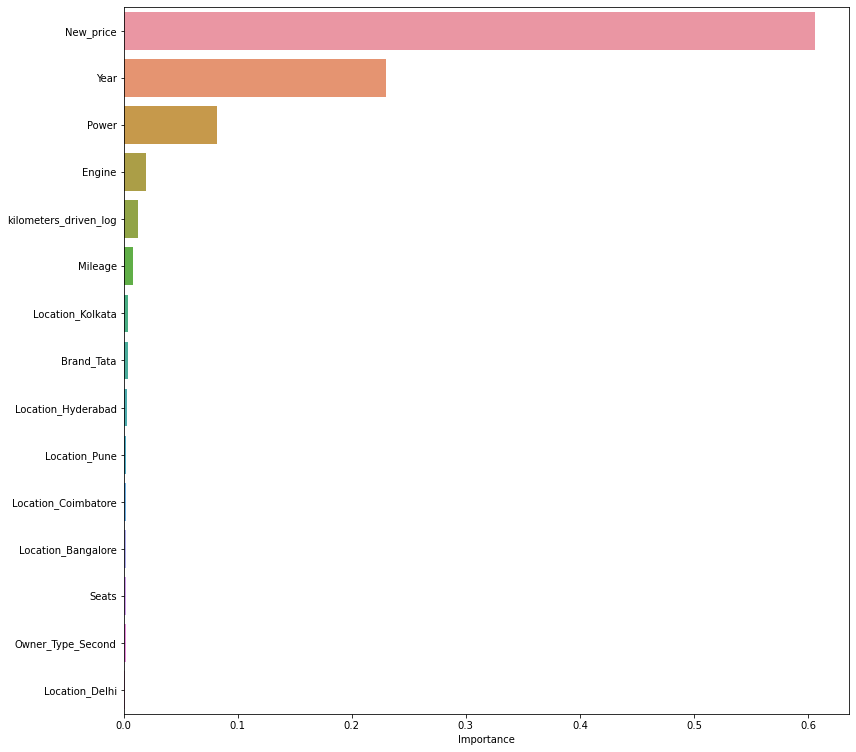

In [79]:
importances = dtree.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

# Let's just consider the biggest 15 values, to be able to plot it in a bar chart
importance_df = importance_df[0:15]

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

#### **Observations from results:**

* R-square on training set is almost 1, which means that our models explain very well the variability observed.
* R-square on test data is much lower at ~0.87, which could be due to overfitting data.
* RMSE on training data is ~0.01.
* RMSE on test data is ~4.4.


* As for feature importance, most relevant features are new_price and year of the car, followed by far by power, engine and logarithmic transformations of kilometers_driven column.

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [80]:
# Import the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [81]:
# Create a random forest regression model
rf = RandomForestRegressor(random_state=1)

In [82]:
# Fit random forest regression model.
rf.fit(X_train, y_train['price_log'])

RandomForestRegressor(random_state=1)

In [83]:
# Get score of the model.
rf_model = get_model_score(rf)

R-square on training set :  0.9831703227755338
R-square on test set :  0.8881987578698258
RMSE on training set :  1.3696475248134543
RMSE on test set :  4.140540489373852


**Feature Importance**

In [84]:
print(pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
New_price              0.594700
Year                   0.230523
Power                  0.097325
Engine                 0.015935
kilometers_driven_log  0.011794
...                         ...
Model_Venture          0.000000
Model_Classic          0.000000
Model_Versa            0.000000
Model_CLS-Class        0.000000
Model_Tiguan           0.000000

[238 rows x 1 columns]


### Let's plot it

<AxesSubplot:xlabel='Importance'>

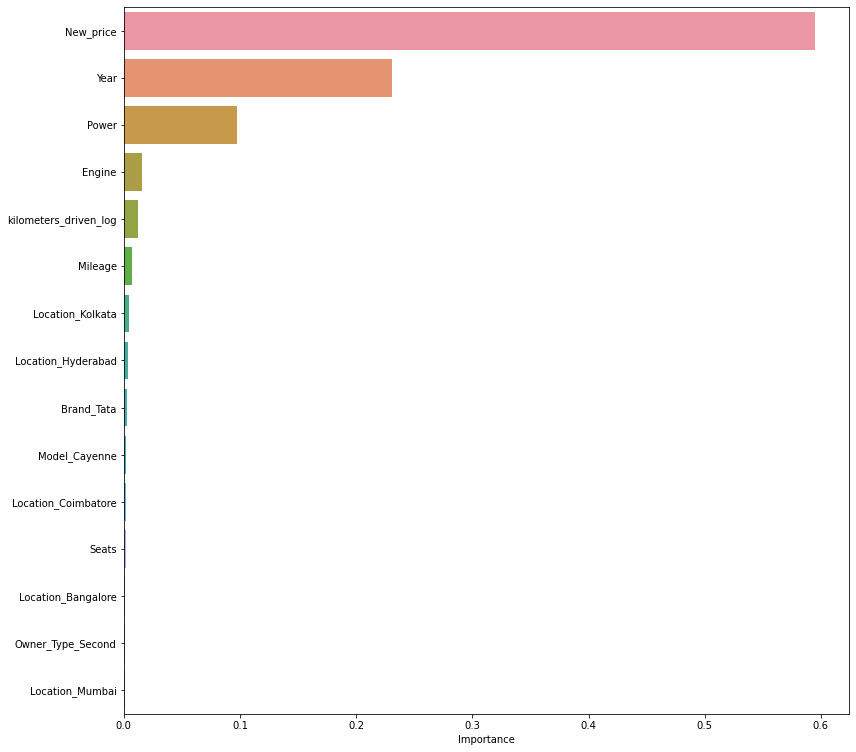

In [85]:
importances = rf.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

# Let's just consider the biggest 15 values, to be able to plot it in a bar chart
importance_df = importance_df[0:15]

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

#### **Observations from results:**

* R-square on training set is still close to 1, but a bit less than our previous model.
* R-square on test data have improved to ~0.89
* RMSE on training data is 1.3
* RMSE on test data is ~4.


* As for feature importance, just like Decision Tree model, most relevant features are new_price and year of the car, followed by far by power, engine, and logarithmic transformations of kilometers_driven column.

### **Hyperparameter Tuning: Decision Tree**

In [86]:
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

# Choose the type of estimator. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from.
# Check documentation for all the parametrs that the model takes and play with those.
parameters = {'max_depth': [None], 
                       'criterion': ['squared_error','friedman_mse'],
                       'min_samples_leaf': [1, 3, 5, 7],
                       'max_leaf_nodes' : [2, 5, 7] + [None],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train['price_log'])

DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=7,
                      random_state=1)

In [87]:
dtree_tuned_model = get_model_score(dtree_tuned)

R-square on training set :  0.935968844278319
R-square on test set :  0.8469160440222605
RMSE on training set :  2.671570221232297
RMSE on test set :  4.845053309227086


**Feature Importance**

In [88]:
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
New_price              0.629924
Year                   0.237921
Power                  0.084343
Engine                 0.019359
kilometers_driven_log  0.005889
...                         ...
Model_Etios            0.000000
Model_Evalia           0.000000
Model_F                0.000000
Model_Fabia            0.000000
Owner_Type_Third       0.000000

[238 rows x 1 columns]


<AxesSubplot:xlabel='Importance'>

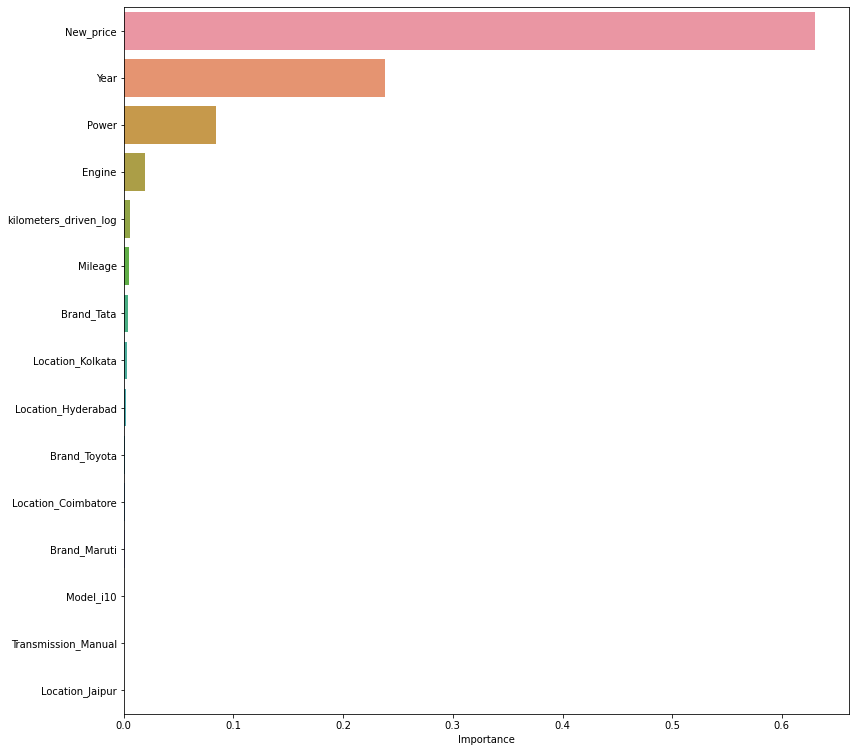

In [89]:
importances = dtree_tuned.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

# Let's just consider the biggest 15 values, to be able to plot it in a bar chart
importance_df = importance_df[0:15]

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

#### **Observations and insights:**

* R-squared has been reduced to ~93% on training data, and increased to ~85% on test data.
* With both values been more similiar to each other, overfitting has been reduced.
* Both RMSE are bigger now.
* As feature importance, it has no significant changes.

### **Hyperparameter Tuning: Random Forest**

In [90]:
# Choose the type of estimator. 
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from.
# Check documentation for all the parametrs that the model takes and play with those.
parameters = {'max_features': ['auto', 'sqrt'],
                       'max_depth': [None],
                       'min_samples_split': [2, 5, 10, 15, 100],
                       'min_samples_leaf': [1, 2, 5, 10]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train['price_log'])

RandomForestRegressor(random_state=1)

In [91]:
rf_tuned_model = get_model_score(rf_tuned)

R-square on training set :  0.9831703227755338
R-square on test set :  0.8881987578698258
RMSE on training set :  1.3696475248134543
RMSE on test set :  4.140540489373852


In [92]:
print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
New_price              0.594700
Year                   0.230523
Power                  0.097325
Engine                 0.015935
kilometers_driven_log  0.011794
...                         ...
Model_Venture          0.000000
Model_Classic          0.000000
Model_Versa            0.000000
Model_CLS-Class        0.000000
Model_Tiguan           0.000000

[238 rows x 1 columns]


<AxesSubplot:xlabel='Importance'>

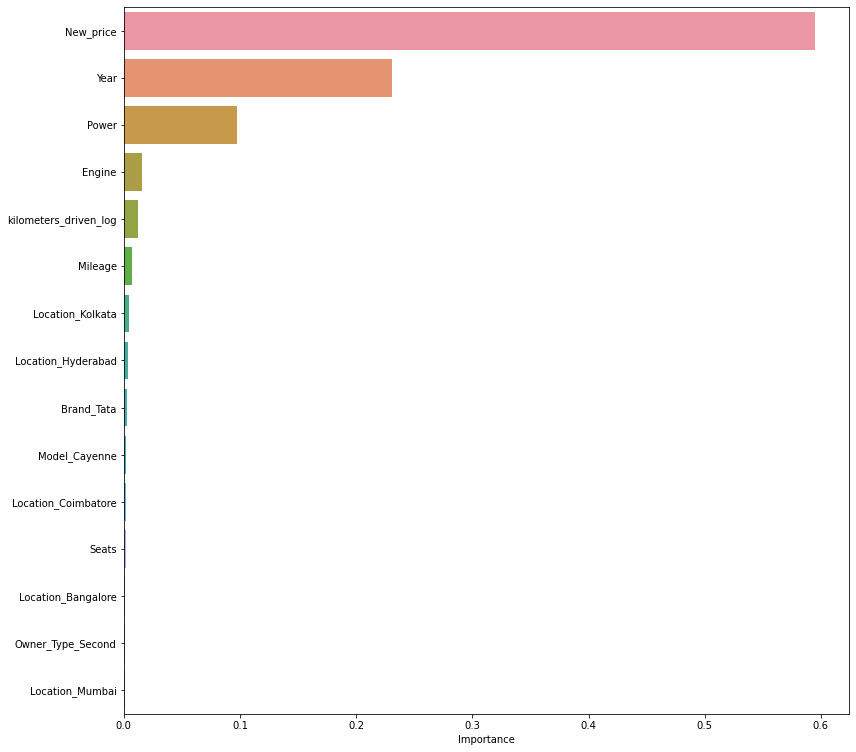

In [93]:
importances = rf_tuned.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

# Let's just consider the biggest 15 values, to be able to plot it in a bar chart
importance_df = importance_df[0:15]

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

#### **Observations and insights:**

* Our model has significatively improved.
* R-square on training data is now ~0.98
* R-square on test data is now ~0.89
* RMSE both on training and on test data are now smaller.

In [94]:
# defining list of models you have trained
models = [lr, ridge, dtree_tuned, rf_tuned]

# defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model,False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [95]:
comparison_frame = pd.DataFrame({'Model': ['Linear Regression',' Ridge Regression', 'Decision Tree','Random Forest'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE':rmse_train,'Test_RMSE':rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.941145,0.893423,2.561308,4.042638
1,Ridge Regression,0.935566,0.903714,2.679961,3.842512
2,Decision Tree,0.935969,0.846916,2.671570,4.845053
3,Random Forest,0.983170,0.888199,1.369648,4.140540


#### **Observations:**

* Ridge Regression model has the best performance on test data, with an R-squared of ~0.90 and a RMSE of ~3.84
* Random Forest model has the best performance overall, with  an R-squared of ~0.98 on train data and of ~0.89 on test data. On the other hand, it has a RMSE of ~1.3 on train data and ~4.1 on test data.
* Linear Regression and Decision Tree model present a good performance overall, but not better than the other two models.

### **Insights**

**Refined insights**:

* We can see that for all the models, there were a short list of relevant features. Most of the importance was distributed between a few features.
* Most important data for the predictions made by our models were new_price, year, power, and engine.
* Due to missing values, we had to drop a lot of data.
* During the cleaning process, we decided to impute missing values in all columns. As a consecuence, new_price variable is highly imputed (+50%), meaning that data on it its just an aproximation to reality. This could lead to a model that is not able to predict accurately enough.

**Comparison of various techniques and their relative performance**:

* From all models showned, Random Forest model behave better, with an R-squared of ~0.98 on train data and of ~0.89 on test data. On the other hand, it has a RMSE of ~1.3 on train data and ~4 on test data.
* There is still room for improvement. On one hand, we could work on the data itself, trying to get more info in order to avoid imputation of missing data. Also we must consider that our data is highly correlated to each other and have lots of outliers and skewness. On the other hand, we could work on hyperparameter tuning, trying different values and searching optimal parameters to enhance or model's performance.

**Proposal for the final solution design**:
- The model proposed for this problem is a Random Forest model, because it has presented the best performance. According to our analysis, it is the most accurate model, given the dataset we worked on.